In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# My understanding of what we need to do with the merging
# The file city_data.csv contains characteristics of each city (driver_count and city_type - Urban/Suburban/Rural); therefore
# there is only one Row per city
# The file ride_data.csv contains multiple entries for each city depending on the ride_id count
# When we merge, it is as if two columns are added to ride_data.csv and in each row, based on the city, the
# additional characteristics (driver_count and city_type) are added from city_data.csv based on the city name in the ride_data.csv file
# Reason for adding left is that the data from city_data_df will ONLY be added to those cities
# that are common in both files

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# City is the common field

combined_city_ride_df = pd.merge(ride_data_df,city_data_df,how='left', on=['city'])

# Start making a habit of cleaning the dataframe

combined_city_ride_df = combined_city_ride_df.dropna(how = "any")

combined_city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [22]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

# Ramesh Kalagnanam comments begin here

# First we need to group the data by type and city;
# next, we need to calculate the "average fare for each city" and "a count of trips for each city"

#Define a data frame bubble_chart_df and initialize it to combined_city_ride_df from Cell 1

bubble_chart_df = combined_city_ride_df

# Group bubble_chart_df by type and city; create 3 dataframes based on logical operator using "loc"
# for each of the 3 types (Rural, Suburban and Urban). Each one will contain only the Rows based on the "type"

group_by_rural = bubble_chart_df.loc[bubble_chart_df['type'] == "Rural"]

group_by_suburban = bubble_chart_df.loc[bubble_chart_df['type'] == "Suburban"]

group_by_urban = bubble_chart_df.loc[bubble_chart_df['type'] == "Urban"]

# Now create additional dataframes using "groupby" - and group based on city
# This will be required for calculating the quantities - average fare and number of rides for a given city

rural_grouped_by_city = group_by_rural.groupby(["city"])

suburban_grouped_by_city = group_by_suburban.groupby(["city"])

urban_grouped_by_city = group_by_urban.groupby(["city"])


# Calculate the quantities for each city based on the type

city_ride_rural = rural_grouped_by_city["ride_id"].count()

city_ride_suburban = suburban_grouped_by_city["ride_id"].count()

city_ride_urban = urban_grouped_by_city["ride_id"].count()


# Calculate the average fare for each city

city_avg_fare_rural = rural_grouped_by_city["fare"].mean()

city_avg_fare_suburban = suburban_grouped_by_city["fare"].mean()

city_avg_fare_urban = urban_grouped_by_city["fare"].mean()

# We want the driver count for each city; the easiest way is to take the mean for each city

city_driver_rural = rural_grouped_by_city["driver_count"].mean()

city_driver_suburban = suburban_grouped_by_city["driver_count"].mean()

city_driver_urban = urban_grouped_by_city["driver_count"].mean()


# Now most of the data the we need for the scatter plot and the first two pie charts have been developed



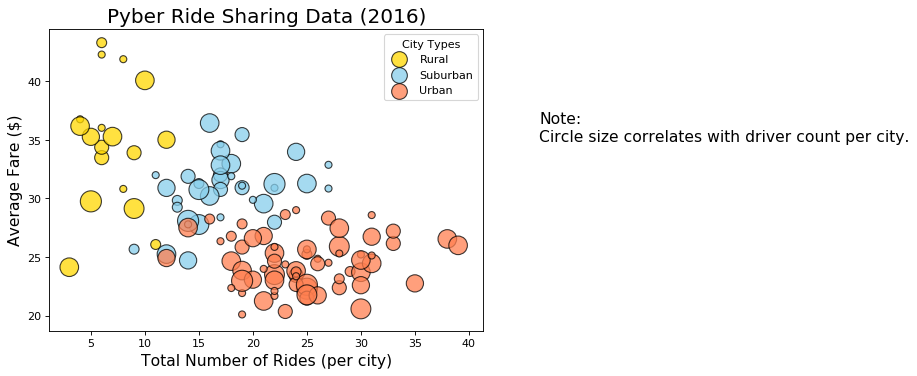

In [23]:
# Set up the plots and arrange them in alphabetical order "Rural", "Suburban", #Urban"

# Set the size of the figure
plt.figure(figsize=(7, 5), dpi=80)

# Define the Note to the right side
note = "Note:\nCircle size correlates with driver count per city."

# Define the 3 scatter plots we need. I have defined them in the alphabetical order of "type" values Rural, Suburban and Urban
# Colors used are per the specification in the Home Work description

plt.scatter(city_ride_rural, city_avg_fare_rural, marker = "o", alpha = 0.75, facecolors = "gold", s=city_driver_rural*40, edgecolors = "black", label = "Rural")
plt.scatter(city_ride_suburban, city_avg_fare_suburban, marker = "o", alpha = 0.75, facecolors = "skyblue", s=city_driver_rural*40, edgecolors = "black", label = "Suburban")
plt.scatter(city_ride_urban, city_avg_fare_urban, marker = "o", alpha = 0.75, facecolors = "coral", s=city_driver_rural*40, edgecolors = "black", label = "Urban")

plt.title("Pyber Ride Sharing Data (2016)", fontsize = 18)
plt.legend(title = "City Types")
plt.xlabel("Total Number of Rides (per city)", fontsize = 14)
plt.ylabel("Average Fare ($)", fontsize = 14)
plt.text(1, 0.6, "Note:\nCircle size correlates with driver count per city.", fontsize=14, transform=plt.gcf().transFigure)

# Save figure
plt.savefig("city_rides_scatter_plot.png", bbox_inches="tight")

# Show plot

plt.show()

## Total Fares by City Type

In [24]:
#Build Pie Chart

# Save Figure


## Following is new code 

# For this piechart, I have defined a new dataframe and initialized it to the original dataframe combined_city_ride_df
# which we obtained by 

pie_chart_df = combined_city_ride_df

grouped_by_city_type = combined_city_ride_df.groupby(["type"])

# Calculate the "total fare" by city type using sum(); this is what we need for the "Total Fares by City Type" chart

total_fares_city_type = grouped_by_city_type["fare"].sum()

# Count the "fare" by city type using count(); this is what we need for the "Total Rides by City Type" chart

total_rides_city_type = grouped_by_city_type["fare"].count()

# For the last Pie Chart "Total Drivers by City Type", we need to make sure no repeats occur, i.e., each city is 
# counted only once. Therefore create a new dataframe to hold one Row per city

single_city_list = combined_city_ride_df.drop_duplicates(subset = "city",keep='first',inplace=False)

# We need to do a groupby(["type"]) so that we can get a sum of the total drivers per city type

single_city_list_by_type = single_city_list.groupby(["type"])

# Now get a sum of drivers per city type

total_drivers_city_type = single_city_list_by_type["driver_count"].sum()





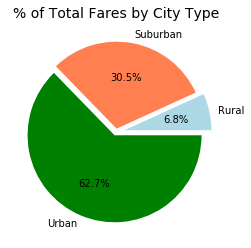

In [25]:
# Define the Plot for Total Fares by City Type
explode = (0.1, 0.04, 0.04)
color = ["lightblue", "coral","green","red"]
plt.pie(total_fares_city_type,explode = explode, colors = color, labels = total_fares_city_type.index, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type", fontsize = 14)

# Save figure
plt.savefig("total_fares_by_city_type_piechart.png")

# Show Figure
plt.show()

## Total Rides by City Type

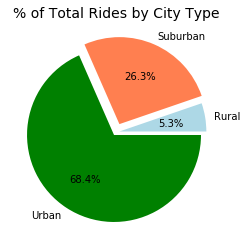

In [26]:
# Build Pie Chart for Total Rides by City Type
explode = (0.04, 0.1, 0.04)
color = ["lightblue", "coral","green","red"]
plt.pie(total_rides_city_type,explode = explode, colors = color, labels = total_rides_city_type.index, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type", fontsize = 14)

# Save figure
plt.savefig("total_rides_by_city_type_piechart.png")

# Show Figure
plt.show()



## Total Drivers by City Type

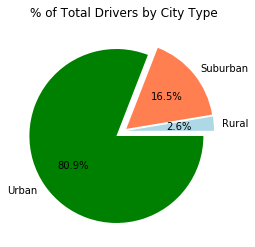

In [27]:
# Build Pie Chart for Total Drivers by City Type
explode = (0.04, 0.04, 0.1)
color = ["lightblue", "coral","green","red"]
plt.pie(total_drivers_city_type,explode = explode, colors = color, labels = total_drivers_city_type.index, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
# Save figure
plt.savefig("total_drivers_by_city_type_piechart.png", fontsize = 14)

# Show Figure
plt.show()
